In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import time

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.target.unique()

In [ ]:
print('cp:',df.cp.unique())
print('fbs:',df.fbs.unique())
print('restecg:',df.restecg.unique())
print('exang:',df.exang.unique())
print('slope:',df.slope.unique())
print('thal:',df.thal.unique())

In [3]:
d1 = pd.get_dummies(df['cp'], prefix='cp')
d2 = pd.get_dummies(df['restecg'], prefix='restecg')
d3 = pd.get_dummies(df['slope'], prefix='slope')
d4 = pd.get_dummies(df['thal'], prefix='thal')

In [4]:
df_new = pd.concat([df,d1,d2,d3,d4], axis=1)

In [5]:
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [6]:
df_new.drop(['cp','restecg','slope','thal'],axis=1, inplace=True)

In [7]:
X = df_new.drop(['target'], axis=1)
y = df_new['target']

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=33)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
def Classifiers():
    classifiers = []
    
    from sklearn.linear_model import LogisticRegression
    classifiers.append(LogisticRegression()) #no variations
                       
    from sklearn.tree import DecisionTreeClassifier
    classifiers.append(DecisionTreeClassifier())  #no variations
    
    from sklearn.neighbors import KNeighborsClassifier
    for n in range(2,10):
        classifiers.append(KNeighborsClassifier(n_neighbors=n))
    #classifiers.append(KNeighborsClassifier()) #n_neighbors
                       
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
    classifiers.append(AdaBoostClassifier())
    classifiers.append(BaggingClassifier()) 
    classifiers.append(GradientBoostingClassifier())
    #classifiers.append(RandomForestClassifier())  #n_estimators
    for n in range(10,160):
        classifiers.append(RandomForestClassifier(n_estimators=n))
    
    from sklearn.svm import LinearSVC, SVC
    classifiers.append(SVC())
    classifiers.append(LinearSVC())
    
    from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
    classifiers.append(BernoulliNB())
    classifiers.append(GaussianNB())
    #classifiers.append(MultinomialNB())
    
    return classifiers

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
def model_run(model, X_train, X_test, y_train, y_test):
    
    #Training
    start_time = time()
    print('Training the data on : ',model.__class__.__name__)
    model = model.fit(X_train, y_train)
    end_time = time()
    #print('Total time taken : ', end_time - start_time)
    
    #predictions

    predictions_train = model.predict(X_train[:100])
    #print('Training score is :',accuracy_score(y_train[:100],predictions_train))
    pred_train_score = accuracy_score(y_train[:100],predictions_train)
    predicions_test = model.predict(X_test)
    print('Test Score is :',accuracy_score(y_test,predicions_test))
    pred_test_score = accuracy_score(y_test,predicions_test)
    return pred_train_score, pred_test_score

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_set_scores = {}
test_set_scores = {}
for i in range(10,160):
    #print('No of Estimators are:',i)
    pred_train, pred_test = model_run(RandomForestClassifier(n_estimators=i), X_train, X_test, y_train, y_test)
    #print(pred_train)
    train_set_scores[i]= pred_train
    test_set_scores[i]= pred_test
#import operator
print("Optimum number of estimators are ",max(train_set_scores.items(), key=operator.itemgetter(1))[0],' with train score : ',max(train_set_scores.values()) )
print("Optimum number of estimators are ",max(test_set_scores.items(), key=operator.itemgetter(1))[0],' with test score : ',max(test_set_scores.values()) )
    

In [ ]:
model_run(RandomForestClassifier(n_estimators=18), X_train, X_test, y_train, y_test)

In [65]:
def main():
    import operator
    classifiers = Classifiers()
    test_set_results = {}
    #best_randomforest_model = None
    RandomForest_testScore = 0
    KNeighbors_testScore = 0    
    for model in classifiers:

        if 'RandomForest' in str(model):
            pred_train, pred_test = model_run(model, X_train, X_test, y_train, y_test)
            if pred_test>RandomForest_testScore:
                print(pred_test,'check 1')
                RandomForest_testScore = pred_test
                model_name = str(model).split('(')[0]
                test_set_results[model_name] = RandomForest_testScore
        elif 'KNeighbors' in str(model):
            pred_train, pred_test = model_run(model, X_train, X_test, y_train, y_test)
            if pred_test>KNeighbors_testScore:
                KNeighbors_testScore = pred_test
                model_name = str(model).split('(')[0]
                test_set_results[model_name] = KNeighbors_testScore            
        else:
            pred_train, pred_test = model_run(model, X_train, X_test, y_train, y_test)
            model_name = str(model).split('(')[0]
            test_set_results[model_name] = pred_test
        #print('Test Score is: ',pred_test)
    print('Best Model for the given data is :',max(test_set_results.items(), key=operator.itemgetter(1))[0],' with test score : ',max(test_set_results.values()) )
    return test_set_results

In [66]:
results = main()

Training the data on :  LogisticRegression
Test Score is : 0.8571428571428571
Training the data on :  DecisionTreeClassifier
Test Score is : 0.7362637362637363
Training the data on :  KNeighborsClassifier
Test Score is : 0.7912087912087912
Training the data on :  KNeighborsClassifier
Test Score is : 0.8021978021978022
Training the data on :  KNeighborsClassifier
Test Score is : 0.8351648351648352
Training the data on :  KNeighborsClassifier
Test Score is : 0.8461538461538461
Training the data on :  KNeighborsClassifier
Test Score is : 0.8901098901098901
Training the data on :  KNeighborsClassifier
Test Score is : 0.8351648351648352
Training the data on :  KNeighborsClassifier
Test Score is : 0.8351648351648352
Training the data on :  KNeighborsClassifier
Test Score is : 0.8241758241758241
Training the data on :  AdaBoostClassifier
Test Score is : 0.7802197802197802
Training the data on :  BaggingClassifier
Test Score is : 0.8131868131868132
Training the data on :  GradientBoostingClass

Test Score is : 0.8021978021978022
Training the data on :  RandomForestClassifier
Test Score is : 0.8131868131868132
Training the data on :  RandomForestClassifier
Test Score is : 0.8461538461538461
Training the data on :  RandomForestClassifier
Test Score is : 0.8241758241758241
Training the data on :  RandomForestClassifier
Test Score is : 0.8131868131868132
Training the data on :  RandomForestClassifier
Test Score is : 0.8461538461538461
Training the data on :  RandomForestClassifier
Test Score is : 0.8461538461538461
Training the data on :  RandomForestClassifier
Test Score is : 0.8131868131868132
Training the data on :  RandomForestClassifier
Test Score is : 0.8131868131868132
Training the data on :  RandomForestClassifier
Test Score is : 0.7912087912087912
Training the data on :  RandomForestClassifier
Test Score is : 0.8351648351648352
Training the data on :  RandomForestClassifier
Test Score is : 0.8131868131868132
Training the data on :  RandomForestClassifier
Test Score is : 

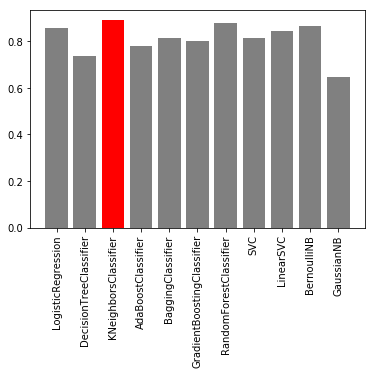

In [68]:
import matplotlib.pyplot as plt

clrs = ['grey' if (x < max(results.values())) else 'red' for x in results.values() ]
plt.bar(range(len(results)), list(results.values()), align='center', color = clrs)
plt.xticks(range(len(results)), list(results.keys()), rotation = 'vertical')

plt.show()